In [2]:
# Import a bunch of things
from ase import Atoms
from pyiid.experiments.elasticscatter import ElasticScatter
import matplotlib.pyplot as plt

In [3]:
# Create the atoms, use the "setup" -> "Nanoparticle" tool in the GUI
atoms = Atoms()
atoms.edit()
print(atoms)

/home/christopher/mc/envs/sim_dev2/lib/python2.7/site-packages/gtk-2.0/gtk/__init__.py:127: RuntimeWarning: PyOS_InputHook is not available for interactive use of PyGTK
  set_interactive(1)


Atoms(symbols='Ni675', positions=..., magmoms=..., tags=..., cell=[21.12, 21.12, 21.12], pbc=[False, False, False])


In [4]:
# Now to simulate the x-ray scattering
scat = ElasticScatter()
pdf = scat.get_pdf(atoms)
r = scat.get_r()

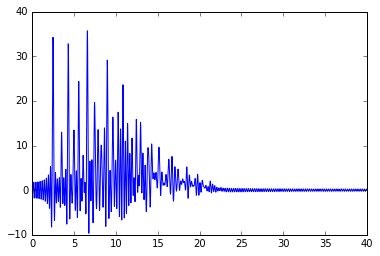

In [5]:
# Plot the data
%matplotlib inline
plt.plot(r, pdf)    
plt.show()

In [6]:
# Note that we can change the experimental parameters
print(scat.exp)
scat.update_experiment({'qmin':2, 'sampling':'ns'})
print(scat.exp)

{'rmin': 0.0, 'qbin': 0.1, 'rstep': 0.01, 'rmax': 40.0, 'qmax': 25, 'sampling': 'full', 'qmin': 0.0}
{'rmin': 0.0, 'qbin': 0.1, 'rstep': 0.12566370614359174, 'rmax': 40.0, 'qmax': 25, 'sampling': 'ns', 'qmin': 2}


In [7]:
# now regenerate the pdf and r
pdf = scat.get_pdf(atoms)
r = scat.get_r()

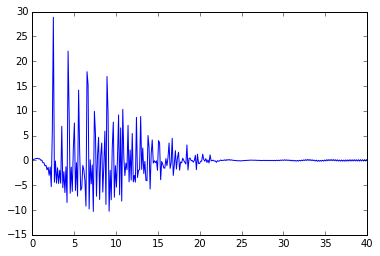

In [8]:
# Plot the data
%matplotlib inline
plt.plot(r, pdf)    
plt.show()

In [10]:
# We can do this for the other data in the PDF creation stack
q = scat.get_scatter_vector()
fq = scat.get_fq(atoms)

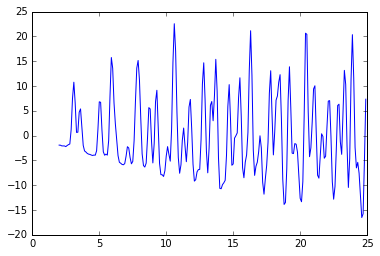

In [11]:
plt.plot(q, fq)
plt.show()

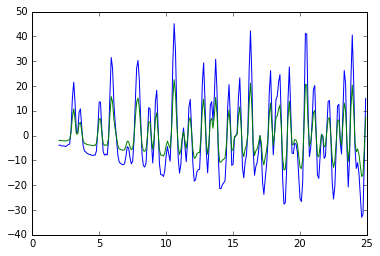

In [12]:
# we can even simulate noisy data
nfq = scat.get_fq(atoms, noise=.1)
plt.plot(q, nfq)
plt.plot(q, fq)
plt.show()